# Benchmark `FFTLog` vs `pyfftlog`

Using 
- https://github.com/prisae/fftlog/blob/master/fftlogtest.ipynb ;
- https://github.com/prisae/pyfftlog/blob/master/fftlogtest.ipynb .

Consult these notebooks for any explanation, there are no comments here, just a benchmark.

### Notes:

To run, you need to
- download [fftlog](https://github.com/prisae/fftlog) and run `python setup.py install`;
- download [pyfftlog](https://github.com/prisae/pyfftlog) and place `pyfftlog.py` in this directory.

In [1]:
import fftlog
import pyfftlog
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [4]:
logrmin = -8
logrmax = 8
mu = 0
q = 0
kr = 1
kropt = 1
tdir = 1
logrc = (logrmin + logrmax)/2

nn = 2**np.arange(3, 13)
result = np.zeros((2, nn.size))

for i, n in enumerate(nn):
    nc = (n + 1)/2.0
    dlogr = (logrmax - logrmin)/n
    dlnr = dlogr*np.log(10.0)

    # Calculate input function
    r = 10**(logrc + (np.arange(1, n+1) - nc)*dlogr)
    ar = r**(mu + 1)*np.exp(-r**2/2.0)

    # Initialize FFTLog
    pykr, pywsave = pyfftlog.fhti(n, mu, dlnr, q, kr, kropt)
    kr, wsave, _ = fftlog.fhti(n, mu, dlnr, q, kr, kropt)

    logkc = np.log10(kr) - logrc
    rk = 10**(logrc - logkc)

    # Call FFTlog or pyfftlog
    pyak = pyfftlog.fftl(ar.copy(), pywsave, rk, tdir)
    ak = fftlog.fftl(ar.copy(), wsave, rk, tdir)
    
    # Ensure the result is the same
    print(f"\n ==> n :: {n:4.0f} -- Result is the same: {np.allclose(pyak, ak)} ({np.allclose(pykr, kr)})")

    # Calculate runtime
    out = %timeit -o pyfftlog.fftl(ar.copy(), pywsave, rk, tdir)
    result[0, i] = out.best
    out = %timeit -o fftlog.fftl(ar.copy(), wsave, rk, tdir)
    result[1, i] = out.best


 ==> n ::    8 -- Result is the same: True (True)
49.5 µs ± 3.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.58 µs ± 263 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

 ==> n ::   16 -- Result is the same: True (True)
69.7 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.33 µs ± 586 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

 ==> n ::   32 -- Result is the same: True (True)
56.6 µs ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.22 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

 ==> n ::   64 -- Result is the same: True (True)
52.4 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
3.88 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

 ==> n ::  128 -- Result is the same: True (True)
79 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
7.67 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

 ==> 

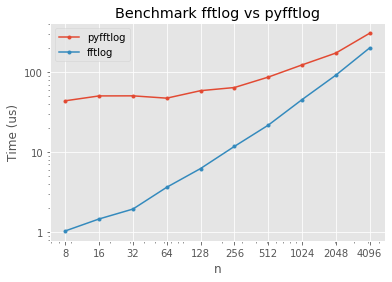

In [9]:
plt.figure()
plt.title('Benchmark fftlog vs pyfftlog')

plt.plot(nn, result[0, :]*1e6, '.-', label='pyfftlog')
plt.plot(nn, result[1, :]*1e6, '.-', label='fftlog')
plt.yscale('log')
plt.xscale('log')
plt.xticks(nn, nn)
plt.yticks([1, 10, 100], [1, 10, 100])
plt.xlabel('n')
plt.ylabel('Time (us)')
plt.legend()

plt.savefig('./benchmark.png', bbox_inches='tight')
plt.show()

In [6]:
import scooby
scooby.Report()

--------------------------------------------------------------------------------
  Date: Thu Aug 22 14:31:39 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.3 (default, Mar 27 2019, 22:11:17)  [GCC 7.3.0]

            1.16.4 : numpy
             1.3.0 : scipy
             7.6.0 : IPython
             3.1.0 : matplotlib
             0.4.1 : scooby

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------